In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

In [ ]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'Class1', 1:'Class2', 2:'Class3'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Verginica'})

### 데이터분할

In [7]:
# 층화추출
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], 
                                                    test_size=0.2, random_state=42)

print(y_train.value_counts())
print(iris['Class'].value_counts())

Versicolour    41
Setosa         40
Verginica      39
Name: Class, dtype: int64
Setosa         50
Versicolour    50
Verginica      50
Name: Class, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], 
                                                    test_size=0.2, random_state=42, stratify=iris['Class'])

print(y_train.value_counts())

Setosa         40
Versicolour    40
Verginica      40
Name: Class, dtype: int64


In [21]:
# 샘플링
#!pip install imbalanced-learn
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE 

X, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)

In [16]:
pd.Series(y).value_counts()

0    1900
1     100
dtype: int64

In [19]:
# 언더샘플링 : 소수샘플수 만큼
%time
undersample = RandomUnderSampler(sampling_strategy='majority')  # 1:1 
X_under, y_under = undersample.fit_resample(X, y)
pd.Series(y_under).value_counts()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


0    100
1    100
dtype: int64

In [18]:
undersample = RandomUnderSampler(sampling_strategy=0.5) # 2:1
X_under, y_under = undersample.fit_resample(X, y)
pd.Series(y_under).value_counts()

0    200
1    100
dtype: int64

In [27]:
# 오버샘플링 : 소수샘플 증식 
%time
oversampling = RandomOverSampler(sampling_strategy='minority')  # 1:1
X_over, y_over = oversampling.fit_resample(X, y)
pd.Series(y_over).value_counts()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs


1    1900
0    1900
dtype: int64

In [25]:
oversampling = RandomOverSampler(sampling_strategy=0.5)  # 2:1
X_over, y_over = oversampling.fit_resample(X, y)
pd.Series(y_over).value_counts()

0    1900
1     950
dtype: int64

In [28]:
# SMOTE : KNN으로 임의 데이터 생성 (오버샘플링)
%time 
smote_sampling = SMOTE(sampling_strategy='minority')  # 1:1 
X_smote, y_smote = smote_sampling.fit_resample(X, y)
pd.Series(y_smote).value_counts()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.7 µs


1    1900
0    1900
dtype: int64

In [29]:
smote_sampling = SMOTE(sampling_strategy=0.5)
X_smote, y_smote = smote_sampling.fit_resample(X, y)
pd.Series(y_smote).value_counts()

0    1900
1     950
dtype: int64

### 스케일링

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

#X = iris[['sepal length (cm)']]
X = iris.drop('Class', axis=1)

std = StandardScaler()
mms = MinMaxScaler()
rbs = RobustScaler()  #######

In [47]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Class'],
      dtype='object')

In [71]:
res = pd.DataFrame(std.fit_transform(X), columns=X.columns)['sepal length (cm)']
print("min > {:4.2f}, mean > {:4.2f}, max > {:4.2f}".format(res.min(), res.mean(), res.max()))

min > -1.87, mean > -0.00, max > 2.49


In [72]:
res = pd.DataFrame(mms.fit_transform(X), columns=X.columns)['sepal length (cm)']
print("min > {:4.2f}, mean > {:4.2f}, max > {:4.2f}".format(res.min(), res.mean(), res.max()))

min > 0.00, mean > 0.43, max > 1.00


In [73]:
res = pd.DataFrame(rbs.fit_transform(X), columns=X.columns)['sepal length (cm)']
print("min > {:4.2f}, mean > {:4.2f}, max > {:4.2f}".format(res.min(), res.mean(), res.max()))

min > -1.15, mean > 0.03, max > 1.62


### 차원축소

In [78]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(iris.drop('Class', axis=1))
print(X.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_fit = pca.fit(X)

print("고유값 : ", pca.singular_values_)
print("분산설명력 : ", pca.explained_variance_ratio_)

(150, 4)
고유값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산설명력 :  [0.72962445 0.22850762 0.03668922 0.00517871]


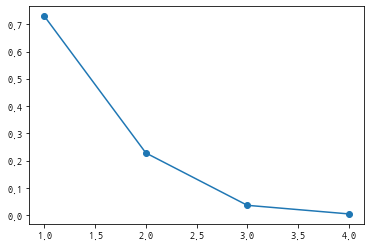

In [83]:
plt.plot(np.arange(1,5), pca.explained_variance_ratio_, 'o-');

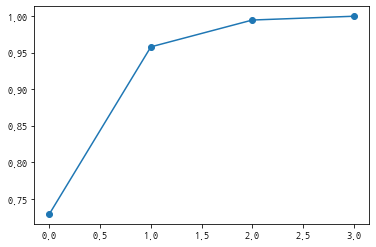

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-');

In [87]:
pca = PCA(n_components=2)
pca_res = pd.DataFrame(pca.fit_transform(X), columns=['pca1', 'pca2'])
pca_res.tail(3)

,pca1,pca2
147,1.521170,0.269069
148,1.372788,1.011254
149,0.960656,-0.024332


### 피처 선택 

- 쿡북 p.260

분산 기준 선택 

In [94]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

In [96]:
np.array(X)  # 원본 

array([[0, 2, 0, 3],
       [0, 1, 4, 3],
       [0, 1, 1, 3]])

In [102]:
from sklearn.feature_selection import VarianceThreshold

X = iris.drop('Class', axis=1)
print(X.shape)

selector = VarianceThreshold(threshold=0.5)  # threshold 설정 필요 
selector.fit_transform(X).shape

(150, 4)


(150, 3)

상관관계 큰 특성 중 하나 제거 

In [109]:
# 예제 데이터 
features = np.array([[1,1,1],
                    [2,2,1],
                    [3,3,1],
                    [4,4,0],
                    [5,5,1],
                    [6,6,0],
                    [7,7,1],
                    [8,7,0],
                    [9,7,1]])

df = pd.DataFrame(features)
print(df.corr())

          0         1         2
0  1.000000  0.976103 -0.273861
1  0.976103  1.000000 -0.327327
2 -0.273861 -0.327327  1.000000


In [112]:
# 상관행렬 
corr_matrix = df.corr().abs()

# 상관행렬 상삼각(upper triangle) 행렬 선택 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수가 0.95보다 큰 피처 열 인덱스 찾기 
threshold = 0.95
to_drop = [c for c in upper.columns if any(upper[c] > threshold)]
print("삭제 피처 인덱스 : ", to_drop)

# 특성 삭제 
df.drop(df.columns[to_drop], axis=1).head(3)

삭제 피처 인덱스 :  [1]


,0,2
0,1,1
1,2,1
2,3,1


타겟 벡터와 관련없는 특성 삭제 : 카이제곱

- 범주형 X 범주형 (음수X) 

In [115]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [122]:
# 데이터 로드 
iris = load_iris()
X = iris.data 
y = iris.target

# 정수형 변환 (범주형으로 강제 변환)
X = X.astype(int)
print(X.shape)

# 카이제곱 통계량이 가장 큰 2개 선택 
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

print(X_kbest.shape)

(150, 4)
(150, 2)


In [123]:
chi2_selector.get_feature_names_out()

array(['x2', 'x3'], dtype=object)

타겟 벡터와 관련없는 특성 삭제:Anova

- 수치형 X 범주형(타겟) 

In [128]:
# 데이터 로드 
iris = load_iris()
X = iris.data 
y = iris.target

# F-통계량이 가장 큰 2개 선택 
from sklearn.feature_selection import SelectPercentile

fvalue_selector = SelectPercentile(f_classif, percentile=75)
X_kbest = fvalue_selector.fit_transform(X, y)

print(X_kbest.shape)

(150, 3)


In [129]:
fvalue_selector.get_feature_names_out()

array(['x0', 'x2', 'x3'], dtype=object)

(끝판왕) 재귀적 특성 제거 

- 모델성능(예:정확도) 나빠지는 경우 특성 제거. 교차검증 

In [131]:
from sklearn.feature_selection import RFECV 
from sklearn.datasets import make_regression 
from sklearn import datasets, linear_model 

# 샘플데이터
X, y = make_regression(n_samples = 10000,
                       n_features = 100,
                       n_informative = 2,
                       random_state = 42)

# 선형회귀모델 
ols = linear_model.LinearRegression()

# 재귀적 특성 제거 
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
rfecv.transform(X).shape

(10000, 2)

In [132]:
rfecv.n_features_

2

In [134]:
rfecv.get_feature_names_out()  # 컬럼명 

array(['x50', 'x66'], dtype=object)

In [135]:
rfecv.ranking_  # 컬럼별 우선순위 ************ 요거 유용!!!

array([75, 39, 66, 10, 72, 96, 58, 64, 91, 60, 84, 15, 76, 50, 40, 44,  6,
       95, 20, 73, 41,  9, 48, 88, 99, 38, 86, 74, 81, 22, 79, 32, 46, 90,
       59, 78, 71, 47, 92, 93, 62, 26, 24, 70, 12, 56, 61,  5, 54, 16,  1,
       23, 34, 49, 83, 45,  4, 97, 85, 55, 13, 89, 69, 51, 80, 36,  1, 94,
       27, 35, 33,  2, 77, 87, 21, 28, 42, 25, 65, 37, 68, 98, 43,  8, 67,
       30, 63, 31, 52, 29,  7, 53, 82, 17,  3, 19, 18, 11, 14, 57])

In [140]:
from sklearn.linear_model import LogisticRegression

# 데이터 로드 
iris = load_iris()
X = iris.data 
y = iris.target

# 재귀적 특성 제거 
rfecv = RFECV(estimator=linear_model.LogisticRegression(), step=1, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
rfecv.transform(X).shape

(150, 4)

In [139]:
rfecv.get_feature_names_out()  # 컬럼명 

array(['x0', 'x1', 'x2', 'x3'], dtype=object)

In [142]:
from sklearn.feature_selection import RFE 

rfe = RFE(estimator=linear_model.LogisticRegression(), n_features_to_select=2)   # 선택 컬럼수를 지정할 수 있음!!! 
rfe.fit(X, y)
rfe.transform(X).shape

(150, 2)

In [143]:
rfe.get_feature_names_out()

array(['x2', 'x3'], dtype=object)